In [1]:
# Initialization Cell
path = 'C:\\Users\\under\\Jupyter-Projects\\My-Research\\On-the-Curse-of-Sentence-Length\\data-bin\\out_balanced_transformer.txt'

In [71]:
from utils import plots
from utils import preprocess
from utils import metrics as m
from utils import splits

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
output = preprocess.loadFairseqOutput(path)
output.shape

(49252, 3)

In [4]:
factors = plots.get_factors(output)

In [5]:
metrics = plots.get_metrics(data=output, n_gram=4)

Edit Distance takes: 2 min 59 sec
BLEU score takes: 6 min 25 sec


In [34]:
# bin by source sentence length
bins_src_len = splits.merge_bin(bins=splits.splitDatabySentenceLength(triples=output, tick=10, choice='src'),
                                target_bin=14)
# bin by reference sentence length
bins_ref_len = splits.merge_bin(bins=splits.splitDatabySentenceLength(triples=output, tick=10, choice='ref'),
                                target_bin=14)
# bin by # unks in source
bins_src_num_unk = splits.merge_bin(bins=splits.splitDatabyNumberOfUnknowns(triples=output, tick=5, choice='src'), 
                                    target_bin=6)
# bin by # unks in reference
bins_ref_num_unk = splits.merge_bin(bins=splits.splitDatabyNumberOfUnknowns(triples=output, tick=5, choice='ref'), 
                                    target_bin=7)
# bin by % unks in source
bins_src_frac_unk = splits.merge_bin(bins=splits.splitDatabyFractionOfUnknowns(triples=output, tick=1, choice='src'), 
                                    target_bin=5)
# bin by % unks in reference
bins_ref_frac_unk = splits.merge_bin(bins=splits.splitDatabyFractionOfUnknowns(triples=output, tick=1, choice='ref'), 
                                    target_bin=5)

In [73]:
# Source length
NUM_DATA, KEYS, BLEU, BLEU_pre, BLEU_bp, EDIT, EDIT_N = \
                  plots.calcAverage(data=bins_src_len, 
                                    edit_dist=m.edit_distance_by_word, 
                                    tick=10)
keys = [int(x)+10 for x in KEYS]

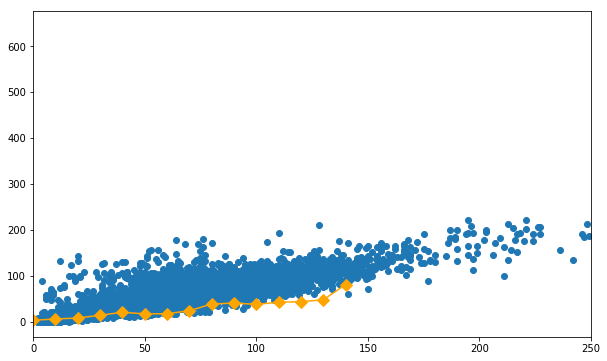

In [59]:
import numpy as np
pair = np.array(list(filter(lambda x: x[1]>0, zip(factors[0][1], metrics[0][1]))))
plt.figure(figsize=(10,6))
plt.plot(keys, EDIT, marker='D', color='orange', markersize=8)
plt.scatter(pair[:,0], pair[:,1])
plt.xlim(0,250)
plt.show()

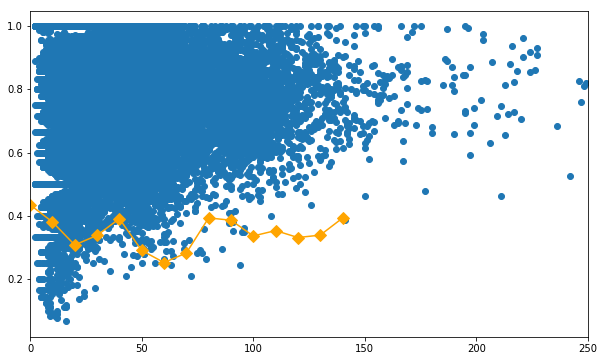

In [60]:
import numpy as np
pair = np.array(list(filter(lambda x: x[1]>0, zip(factors[0][1], metrics[1][1]))))
plt.figure(figsize=(10,6))
plt.plot(keys, EDIT_N, marker='D', color='orange', markersize=8)
plt.scatter(pair[:,0], pair[:,1])
plt.xlim(0,250)
plt.show()

In [62]:
np.array(list(zip(factors[0][1], metrics[1][1])))

array([[  2.        ,   0.        ],
       [  2.        ,   1.        ],
       [  2.        ,   1.        ],
       ...,
       [249.        ,   0.8209607 ],
       [248.        ,   0.80988593],
       [247.        ,   0.75918367]])

In [66]:
for m in metrics:
    print(m[0])

Edit Distance
Normalized Edit Distance
Bleu Precision
Bleu Brevity Penalty
Bleu Score


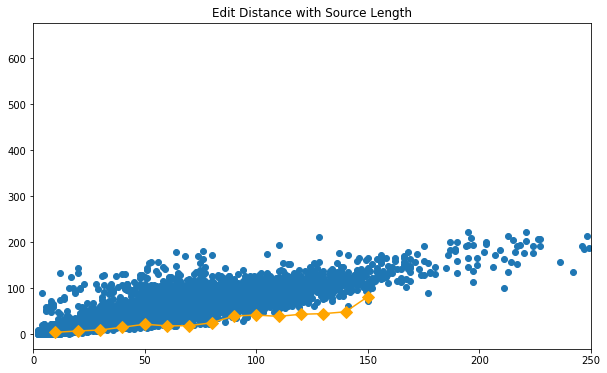

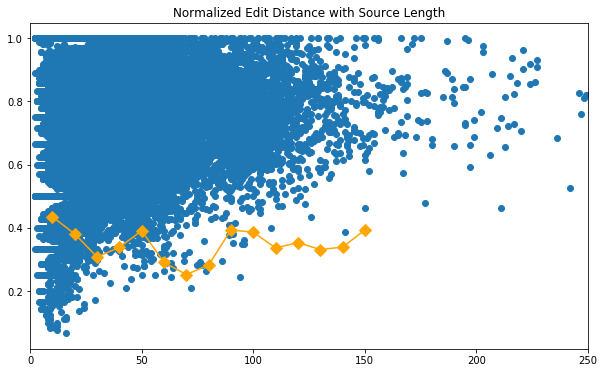

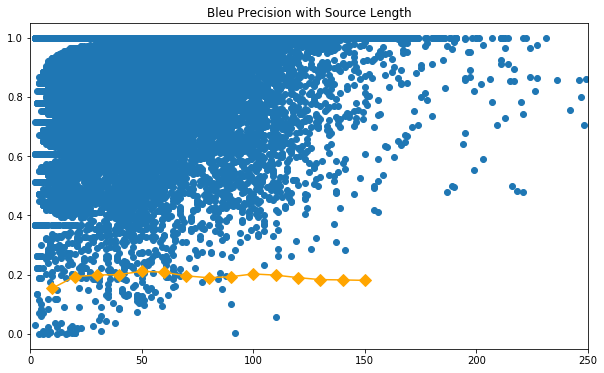

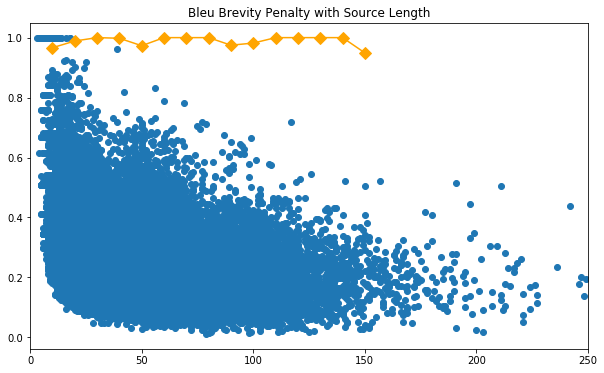

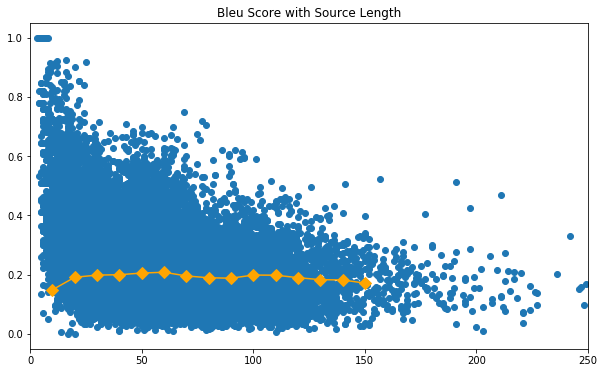

In [74]:
plots.plot_scatter_line(metrics_scatter=metrics, 
                        factor_scatter=factors[0], 
                        metrics_line=[EDIT, EDIT_N, BLEU_pre, BLEU_bp, BLEU], 
                        factor_line=keys,
                        xlim=250,
                        remove_zero=True)

In [69]:
plots.plot_scatter_line(metrics_scatter=metrics, 
                        factor_scatter=factors[0], 
                        metrics_line=[EDIT, EDIT_N, BLEU_pre, BLEU_bp, BLEU], 
                        factor_line=keys,
                        xlim=250,
                        remove_zero=True)

2